# Generate base plots for figure 3

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os

import scmdata
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ndcs.constants import (
    PROCESSED_DATA_DIR,
    NDC_TARGET_RELEASE,
    RAW_DATA_DIR,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

<IPython.core.display.Javascript object>

In [4]:
DATA_DIR = os.path.join(PROCESSED_DATA_DIR, "climate_assessment", "merged")
OUT_COMPLETE_FNAME = os.path.join(DATA_DIR, f"output_{NDC_TARGET_RELEASE}_complete.csv")
OUT_SENSITIVITY_FNAME = os.path.join(
    DATA_DIR, f"output_{NDC_TARGET_RELEASE}_sensitivity.csv"
)
OUT_METHANE_PLEDGES_FNAME = os.path.join(
    DATA_DIR, f"output_{NDC_TARGET_RELEASE}_methanePledges.csv"
)

<IPython.core.display.Javascript object>

In [5]:
results_sensitivity = scmdata.run_append(
    [scmdata.ScmRun(OUT_SENSITIVITY_FNAME), scmdata.ScmRun(OUT_METHANE_PLEDGES_FNAME)]
).filter(label="", keep=False)
results_sensitivity.get_unique_meta("label")

['a',
 'b',
 'A',
 'A-hot air',
 'A-constant',
 'A-rate',
 'e',
 'g',
 'c',
 'd',
 'f',
 'h',
 'B',
 'n',
 'm',
 'o']

<IPython.core.display.Javascript object>

In [6]:
# results_sensitivity.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [7]:
## read in SSP comparison data.

SSP_FNAME = os.path.join(
    PROCESSED_DATA_DIR, "SSP_emission_data", "KeySSPs_TotalAR6GWP_CH4data2.csv"
)

ssp_data = pd.read_csv(SSP_FNAME)

<IPython.core.display.Javascript object>

In [8]:
AR6GSAT_FNAME = os.path.join(PROCESSED_DATA_DIR, "AR6_GSAT", "AR6_GSAT_June2021.csv")

ar6gsat_data = pd.read_csv(AR6GSAT_FNAME)

<IPython.core.display.Javascript object>

In [9]:
rcmip_emissions = scmdata.ScmRun(
    os.path.join(RAW_DATA_DIR, "rcmip", "rcmip-emissions-annual-means-v5-1-0.csv"),
    lowercase_cols=True,
).filter(
    variable=["Emissions|CO2", "Emissions|CH4"],
    scenario=["ssp119", "ssp126", "ssp245"],
    region="World",
)
rcmip_emissions

<ScmRun (timeseries: 6, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	         activity_id mip_era            model region scenario       unit       variable
	4908  not_applicable   CMIP6            IMAGE  World   ssp119  Mt CH4/yr  Emissions|CH4
	4924  not_applicable   CMIP6            IMAGE  World   ssp119  Mt CO2/yr  Emissions|CO2
	5710  not_applicable   CMIP6            IMAGE  World   ssp126  Mt CH4/yr  Emissions|CH4
	5726  not_applicable   CMIP6            IMAGE  World   ssp126  Mt CO2/yr  Emissions|CO2
	6552  not_applicable   CMIP6  MESSAGE-GLOBIOM  World   ssp245  Mt CH4/yr  Emissions|CH4
	6568  not_applicable   CMIP6  MESSAGE-GLOBIOM  World   ssp245  Mt CO2/yr  Emissions|CO2

<IPython.core.display.Javascript object>

## Read in country info

In [10]:
pathway_countries_fn = os.path.join(
    PROCESSED_DATA_DIR, "{}_pathway_countries.csv".format(NDC_TARGET_RELEASE)
)
pathway_countries_fn

'/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/12Nov2021a_CR_pathway_countries.csv'

<IPython.core.display.Javascript object>

In [11]:
country_submission_dates = pd.read_csv(pathway_countries_fn)

<IPython.core.display.Javascript object>

In [12]:
country_submission_dates[
    country_submission_dates.pathway_id.isin(
        results_sensitivity.get_unique_meta("pathway_id")
    )
]

pathway_id last_country
352  2021-11-03_1          NZL
353  2021-11-09_1          VEN

<IPython.core.display.Javascript object>

# Check latest

In [13]:
# results_cleaned.filter(
#     pathway_id="2021-11-03_1",
#     variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
#     quantile=0.5,
#     country_extension="SSP1BL",
# ).timeseries()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='K'>

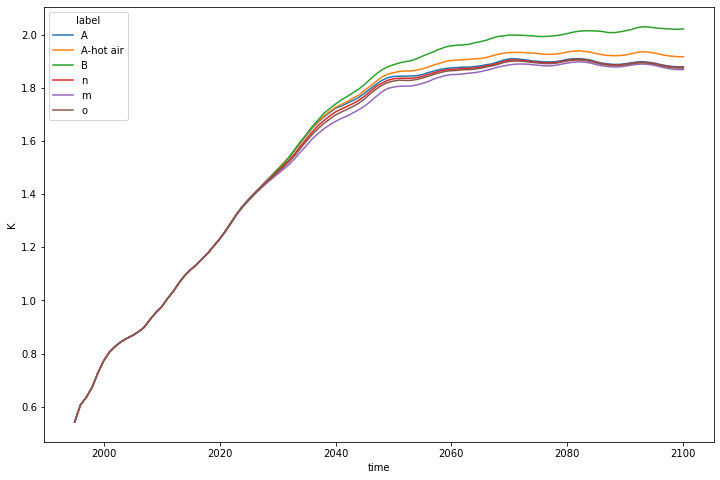

<IPython.core.display.Javascript object>

In [14]:
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    country_extension="SSP1BL",
).lineplot(hue="label")

In [15]:
results_sensitivity.head()

time                                                                                                                                                                                                                       1995-01-01  1996-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                                          include         b          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                        SSP1BL            exclude         A          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                                          include         A-hot air  NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                        constant          exclude         A-constant NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__constant__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   

time                                                                                                                                                                                                                       1997-01-01  1998-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                                          include         b          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                        SSP1BL            exclude         A          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                                          include         A-hot air  NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                        constant          exclude         A-constant NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__constant__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   

time                                                                                                                                                                                                                       1999-01-01  2000-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN      

<IPython.core.display.Javascript object>

# Figures
For each scenario, we plot one panel GHG GWP-AR6 (Total excl. LULUCF) and one GSAT.
In each panel, there are three background scenarios, the SSP1-1.9, SSP1-2.6 and SSP2-4.5.

In [16]:
results_cleaned = results_sensitivity

<IPython.core.display.Javascript object>

In [17]:
FIGURE_VERSION = "20220116"


def get_figure_fname(name):
    return os.path.join(
        PROCESSED_DATA_DIR, "figures", f"figure3_{name}_{FIGURE_VERSION}.pdf"
    )

<IPython.core.display.Javascript object>

In [18]:
extended_emissions = scmdata.ScmRun(
    os.path.join(
        PROCESSED_DATA_DIR,
        "global_emissions_pathways",
        NDC_TARGET_RELEASE,
        "emissions_ghg_extended.csv",
    )
)

extended_emissions_items = []
uniq_vars = [
    "pathway_id",
    "ambition",
    "conditionality",
    "country_extension",
    "exclude_hot_air",
]

for s in extended_emissions.groupby(uniq_vars):
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars])
    s["scenario"] = scenario
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars[1:]])
    s["scenario_without_pathway"] = scenario

    extended_emissions_items.append(s)
extended_emissions = scmdata.run_append(extended_emissions_items)


<IPython.core.display.Javascript object>

In [19]:
results_cleaned_list = []
for s in results_sensitivity.groupby(uniq_vars):
    scenario = "__".join([s.get_unique_meta(c, True) for c in uniq_vars[1:]])
    s["scenario_without_pathway"] = scenario

    results_cleaned_list.append(s)
results_sensitivity = scmdata.run_append(results_cleaned_list)

<IPython.core.display.Javascript object>

In [20]:
results_cleaned = scmdata.run_append(
    [
        results_cleaned,
        results_cleaned.filter(
            variable="Infilled|Emissions|CO2|Energy and Industrial Processes"
        ).add(
            results_cleaned.filter(variable="Infilled|Emissions|CO2|AFOLU"),
            {"variable": "Infilled|Emissions|CO2"},
        ),
    ]
)

<IPython.core.display.Javascript object>

In [21]:
sr15_rcmip_data = (
    scmdata.ScmRun(os.path.join(RAW_DATA_DIR, "sr15_rcmip", "data.csv"))
    .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .resample("AS")
)

/home/jared/miniconda3/envs/ndc-realisations-2021/lib/python3.9/site-packages/scmdata/run.py:75: DtypeWarning: Columns (1,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  return _format_data(_read_pandas(fnames, *args, **kwargs), required_cols)


<IPython.core.display.Javascript object>

In [22]:
sr15_data_cleaned = scmdata.ScmRun(os.path.join(PROCESSED_DATA_DIR, "sr15_data.csv"))
sr15_data_cleaned = scmdata.run_append(
    [
        sr15_data_cleaned,
        sr15_data_cleaned.filter(
            variable="Emissions|CO2|MAGICC Fossil and Industrial"
        ).add(
            sr15_data_cleaned.filter(variable="Emissions|CO2|MAGICC AFOLU"),
            {"variable": "Emissions|CO2"},
        ),
    ]
)

<IPython.core.display.Javascript object>

In [23]:
extended_subset = extended_emissions.filter(
    scenario=results_sensitivity.get_unique_meta("scenario")
)
extended_subset.get_unique_meta("scenario")

['2021-11-09_1__high__C__2030__exclude',
 '2021-11-09_1__high__C__2030__include',
 '2021-11-09_1__high__C__SSP1BL__exclude',
 '2021-11-09_1__high__C__SSP1BL__include',
 '2021-11-09_1__high__C__constant__exclude',
 '2021-11-09_1__high__C__rate__exclude',
 '2021-11-09_1__high__U__2030__exclude',
 '2021-11-09_1__high__U__2030__include',
 '2021-11-09_1__low__C__2030__exclude',
 '2021-11-09_1__low__C__2030__include',
 '2021-11-09_1__low__U__2030__exclude',
 '2021-11-09_1__low__U__2030__include',
 '2021-11-09_1__low__U__SSP1BL__exclude']

<IPython.core.display.Javascript object>

In [24]:
pkwargs = {
    "hue": None,
    "color": "0.7",
    "lw": 0.6,
    "alpha": 0.4,
    "units": "id",
    "estimator": None,
    "legend": False,
}
ssp_pkwargs = {
    "hue": None,
    "color": "0.9",
    "lw": 3,
    "alpha": 0.6,
    "units": "scenario",
    "estimator": None,
    "legend": False,
}
palette = {
    "2021-10-18_1": "tab:red",
    "2021-10-28_1": "tab:orange",
    "2021-10-28_2": "tab:blue",
    "2021-11-01_1": "tab:green",
}


<IPython.core.display.Javascript object>

In [25]:
extended_emissions.timeseries()

time                                                                                                                                                                                                                                                                                                  2015-01-01  \
ambition conditionality country_extension date       exclude_hot_air global_extension last_country model         pathway_id   pathway_num pathway_num_today region scenario                                scenario_without_pathway  stage    unit        variable                                                 
high     C              SSP1BL            2013-07-18 exclude         NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__C__SSP1BL__exclude  high__C__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              SSP1BL            2013-07-18 exclude         NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__high__U__SSP1BL__exclude  high__U__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
low      C              SSP1BL            2013-07-18 exclude         NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__low__C__SSP1BL__exclude   low__C__SSP1BL__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              SSP1BL            2013-07-18 exclude         NaN              LBY          NDC Factsheet 2013-07-18_1 1           1                 World  2013-07-18_1__low__U__SSP1BL__exclude   low__U__SSP1BL__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
high     C              SSP1BL            2013-07-18 exclude         NaN              ZZA          NDC Factsheet 2013-07-18_2 2           2                 World  2013-07-18_2__high__C__SSP1BL__exclude  high__C__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              SSP1BL            2013-07-18 exclude         NaN              ZZA          NDC Factsheet 2013-07-18_2 2           2                 World  2013-07-18_2__high__U__SSP1BL__exclude  high__U__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
low      C              SSP1BL            2013-07-18 exclude         NaN              ZZA          NDC Factsheet 2013-07-18_2 2           2                 World  2013-07-18_2__low__C__SSP1BL__exclude   low__C__SSP1BL__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              SSP1BL            2013-07-18 exclude         NaN              ZZA          NDC Factsheet 2013-07-18_2 2           2                 World  2013-07-18_2__low__U__SSP1BL__exclude   low__U__SSP1BL__exclude   extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
high     C              SSP1BL            2013-07-18 exclude         NaN              ZZB          NDC Factsheet 2013-07-18_3 3           3                 World  2013-07-18_3__high__C__SSP1BL__exclude  high__C__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
         U              SSP1BL            2013-07-18 exclude         NaN              ZZB          NDC Factsheet 2013-07-18_3 3           3                 World  2013-07-18_3__high__U__SSP1BL__exclude  high__U__SSP1BL__exclude  extended Mt CO2 / yr Emissions|GHG excl CO2 AFOLU (AR6GWP100)  50801.212705   
...                                                                                                                                                                                                                                                                                                          ...

<IPython.core.display.Javascript object>

In [26]:
ar6gsat_data

Year  AR6_GSAT
0    1850    -0.059
1    1851     0.049
2    1852     0.079
3    1853     0.046
4    1854     0.049
5    1855     0.049
6    1856    -0.051
7    1857    -0.146
8    1858    -0.039
9    1859     0.069
..    ...       ...
161  2011     0.881
162  2012     0.906
163  2013     0.936
164  2014     1.006
165  2015     1.149
166  2016     1.264
167  2017     1.179
168  2018     1.101
169  2019     1.226
170  2020     1.256

[171 rows x 2 columns]

<IPython.core.display.Javascript object>

In [27]:
results_cleaned.get_unique_meta("quantile")

[0.1, 0.1669999999999999, 0.33, 0.05, 0.5, 0.67, 0.833, 0.9, 0.95, nan]

<IPython.core.display.Javascript object>

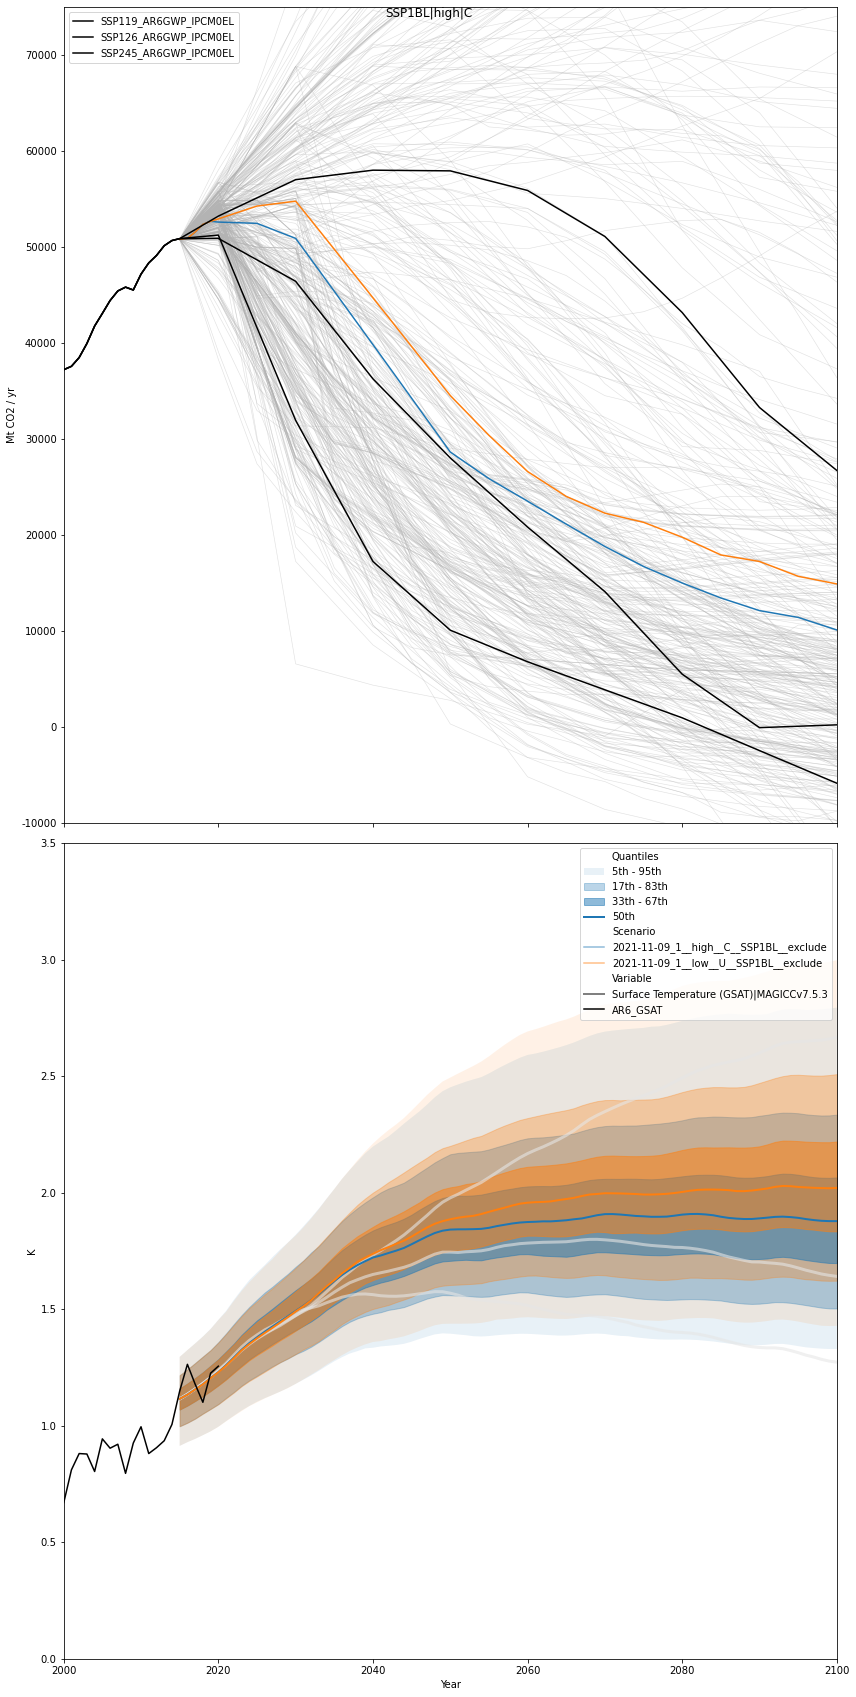

<IPython.core.display.Javascript object>

In [28]:
axs = plt.figure(figsize=(12, 24)).subplots(2, sharex=True)
plt.suptitle("SSP1BL|high|C")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}
lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.1669999999999999, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP119_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP126_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP245_AR6GWP_IPCM0EL", color="black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")


ar6gsat_data.plot(ax=axs[1], x="Year", y="AR6_GSAT", color="black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)
plt.tight_layout()


plt.savefig(get_figure_fname("low_and_high"))

In [29]:
results_cleaned.get_unique_meta("variable")

['Atmospheric Concentrations|CH4|MAGICCv7.5.3',
 'Atmospheric Concentrations|CO2|MAGICCv7.5.3',
 'Atmospheric Concentrations|N2O|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|BC|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|OC|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Direct Effect|Sulfur|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|Indirect Effect|MAGICCv7.5.3',
 'Effective Radiative Forcing|Aerosols|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3',
 'Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3',
 'Effective Radiative Forcing|C2F6|MAGICCv7.5.3',
 'Effective Radiative Forcing|C6F14|MAGICCv7.5.3',
 'Effective Radiative Forcing|CF4|MAGICCv7.5.3',
 'Effective

<IPython.core.display.Javascript object>

In [30]:
ssp_data

Unnamed: 0  SSP126_AR6GWP_KyotoGHG  SSP126_AR6GWP_CO2LULUCF  SSP126_AR6GWP_IPCM0EL  SSP119_AR6GWP_KyotoGHG  SSP119_AR6GWP_CO2LULUCF  SSP119_AR6GWP_IPCM0EL  SSP245_AR6GWP_KyotoGHG  SSP245_AR6GWP_CO2LULUCF  SSP245_AR6GWP_IPCM0EL  SSP126_CH4  \
0          1750              861.180591               297.464607             563.715984              861.180591               297.464607             563.715984              861.180591               297.464607             563.715984   19.019783   
1          1751              864.176682               302.937098             561.239584              864.176682               302.937098             561.239584              864.176682               302.937098             561.239584   18.915109   
2          1752              869.497363               308.510269             560.987094              869.497363               308.510269             560.987094              869.497363               308.510269             560.987094   18.889712   
3          1753              882.097462               314.185969             567.911493              882.097462               314.185969             567.911493              882.097462               314.185969             567.911493   19.121377   
4          1754              899.167288               319.966086             579.201202              899.167288               319.966086             579.201202              899.167288               319.966086             579.201202   19.509061   
5          1755              905.295827               325.852540             579.443287              905.295827               325.852540             579.443287              905.295827               325.852540             579.443287   19.500455   
6          1756              911.370592               331.847288             579.523303              911.370592               331.847288             579.523303              911.370592               331.847288             579.523303   19.462537   
7          1757              933.628073               337.952323             595.675750              933.628073               337.952323             595.675750              933.628073               337.952323             595.675750   20.023541   
8          1758              937.857198               344.169672             593.687526              937.857198               344.169672             593.687526              937.857198               344.169672             593.687526   19.934005   
9          1759              950.496455               350.501403             599.995052              950.496455               350.501403             599.995052              950.496455               350.501403             599.995052   20.141466   
..          ...                     ...                      ...                    ...                     ...                      ...                    ...                     ...                      ...                    ...         ...   
341        2091            -2238.567996             -2166.071523             -72.496473            -5075.741250             -2238.801069           -2836.940181            28246.199870             -4365.391143           32611.591010  129.336686   
342        2092            -2290.774333             -2247.462440             -43.311892            -5431.312633             -2254.639482           -3176.673151            27542.000930             -4413.660180           31955.661110  128.543687   
343        2093            -2343.123701             -2329.076347             -14.047354            -5787.858184             -2270.521289           -3517.336896            26835.872680             -4462.061462           31297.934140  127.748514   
344        2094            -2395.330038             -2410.467265              15.137227            -6143.429567             -2286.359702           -3857.069865            26131.673740             -4510.330500           30642.004240  126.955514   
345        2095            -2447.536375             -

<IPython.core.display.Javascript object>

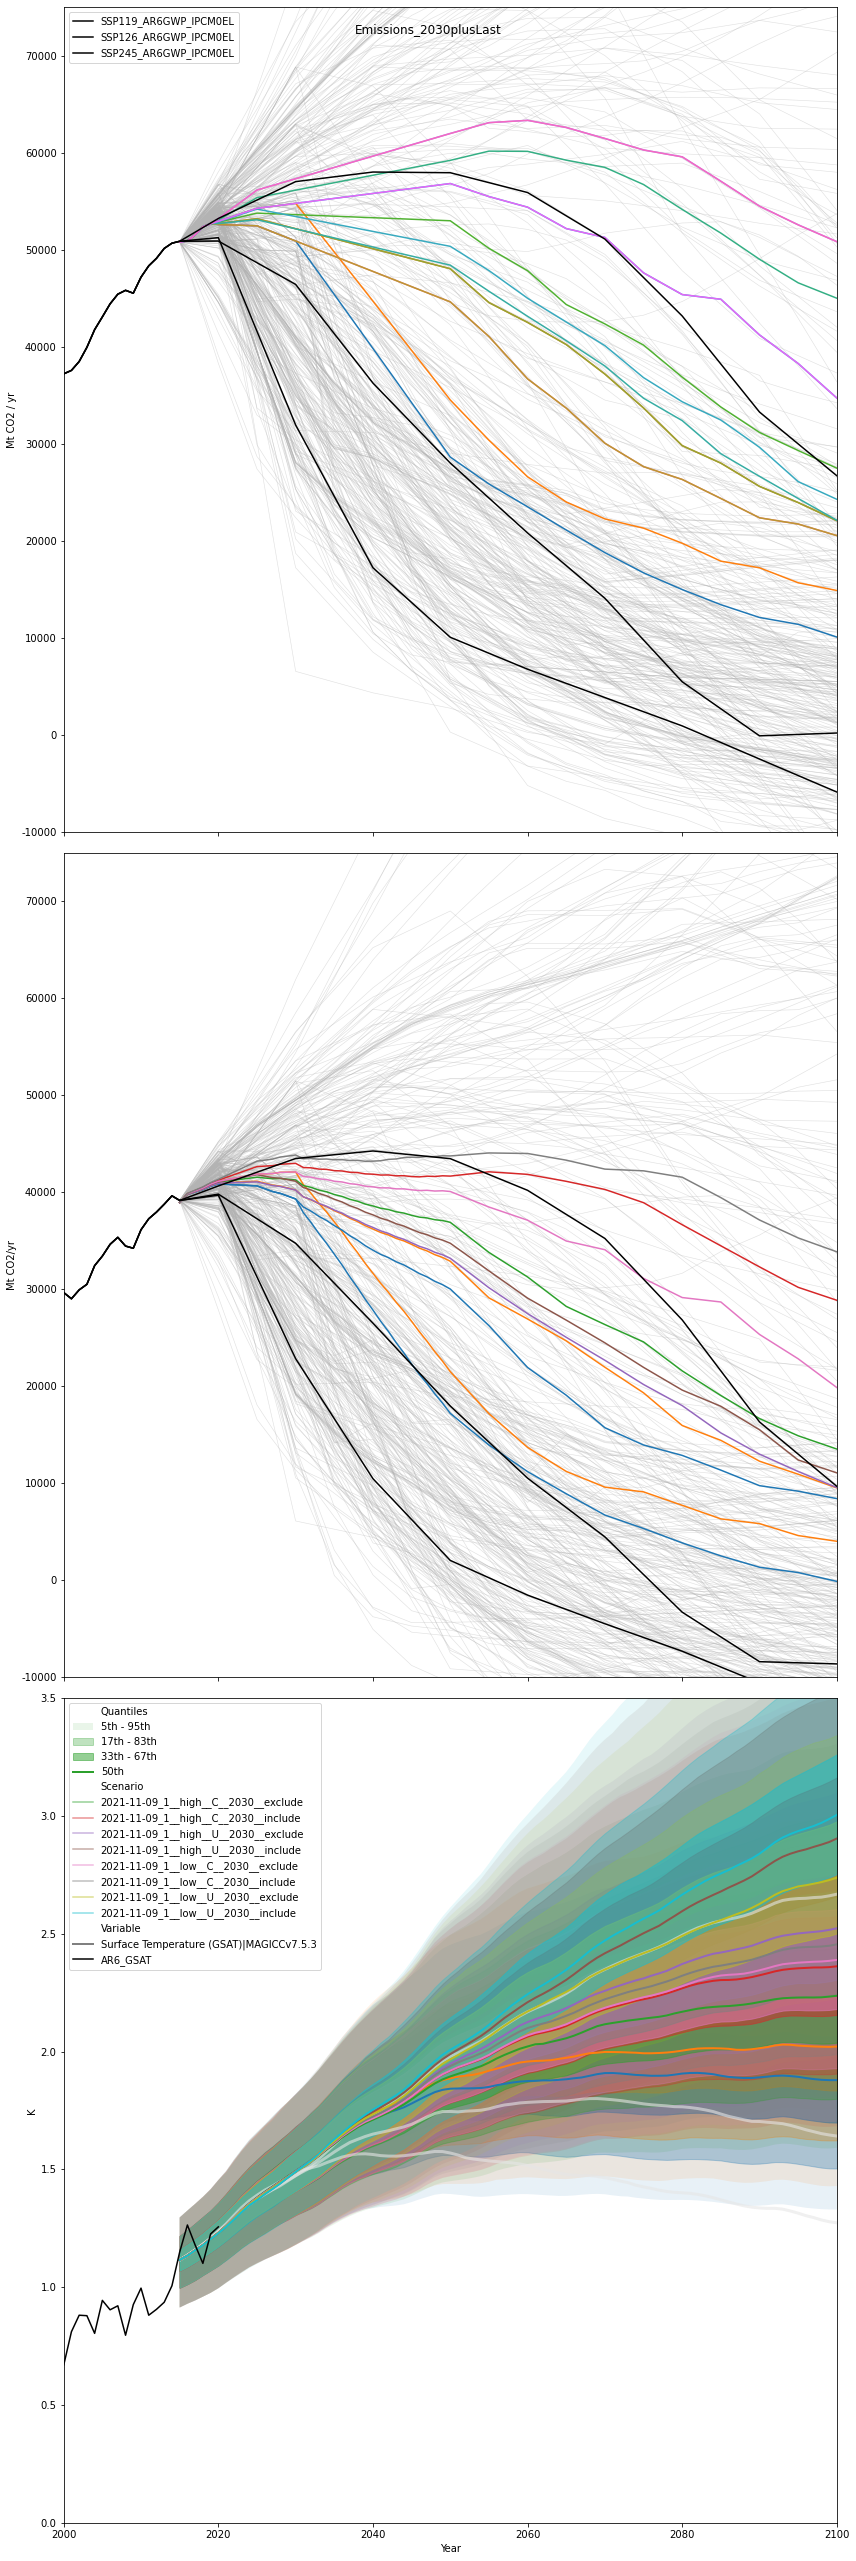

<IPython.core.display.Javascript object>

In [31]:
axs = plt.figure(figsize=(12, 36)).subplots(3, sharex=True)
plt.suptitle("Emissions_2030plusLast")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}

filters2030 = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}

lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.1669999999999999, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}

# GHG emissions
sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

extended_emissions.filter(**filters2030).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)


ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP119_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP126_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP245_AR6GWP_IPCM0EL", color="black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)

# CO2 emissions
sr15_data_cleaned.filter(variable="Emissions|CO2").lineplot(
    ax=axs[1], **pkwargs, time_axis="year"
)
results_cleaned.filter(variable="Infilled|Emissions|CO2", **filters).lineplot(
    ax=axs[1], **lineplot_kwargs, legend=False, time_axis="year"
)

results_cleaned.filter(variable="Infilled|Emissions|CO2", **filters2030).lineplot(
    ax=axs[1], **lineplot_kwargs, legend=False, time_axis="year"
)

rcmip_emissions.filter(variable="Emissions|CO2").lineplot(
    ax=axs[1],
    legend=False,
    time_axis="year",
    color="black",
    hue=None,
    units="scenario",
    estimator=None,
)

axs[1].set_ylim(-10000, 75000)
axs[1].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[2], **ssp_pkwargs, time_axis="year")
results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[2], pre_calculated=True, **plume_kwargs, time_axis="year")

results_cleaned.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters2030,
).plumeplot(ax=axs[2], pre_calculated=True, **plume_kwargs, time_axis="year")


ar6gsat_data.plot(ax=axs[2], x="Year", y="AR6_GSAT", color="black")


axs[2].set_ylim(0, 3.5)
axs[2].set_xlim(2000, 2100)
plt.tight_layout()
plt.savefig(get_figure_fname("low_and_high_AND_2030_emissions"))

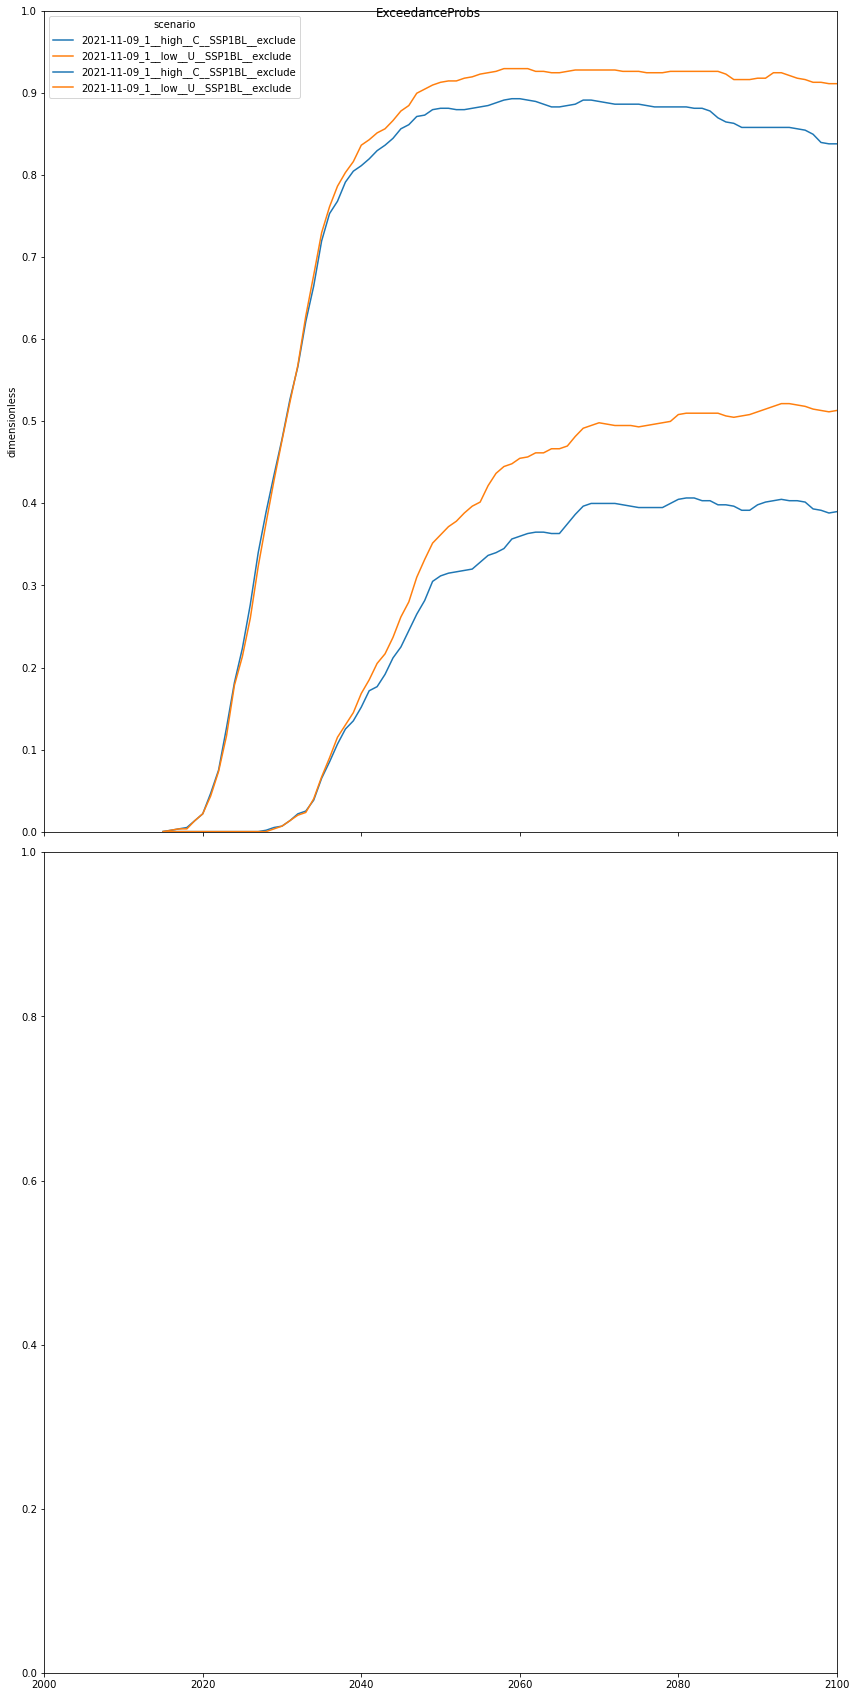

<IPython.core.display.Javascript object>

In [32]:
axs = plt.figure(figsize=(12, 24)).subplots(2, sharex=True)
plt.suptitle("ExceedanceProbs")

filters = {
    "scenario": [
        "2021-11-09_1__low__U__SSP1BL__exclude",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}

filters2030 = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}

lineplot_kwargs = {"hue": "scenario"}
plume_kwargs = {
    "hue_var": "scenario",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.1669999999999999, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


results_cleaned.filter(
    variable="Exceedance Probability 1.5C|MAGICCv7.5.3",
    **filters,
).lineplot(ax=axs[0], **lineplot_kwargs, time_axis="year")

results_cleaned.filter(
    variable="Exceedance Probability 2.0C|MAGICCv7.5.3",
    **filters,
).lineplot(ax=axs[0], **lineplot_kwargs, time_axis="year")


axs[0].set_ylim(0, 1)
axs[0].set_xlim(2000, 2100)
axs[0].set_yticks(ticks=np.arange(0, 1.05, 0.1))

plt.tight_layout()
plt.savefig(get_figure_fname("ExceedanceProbs"))

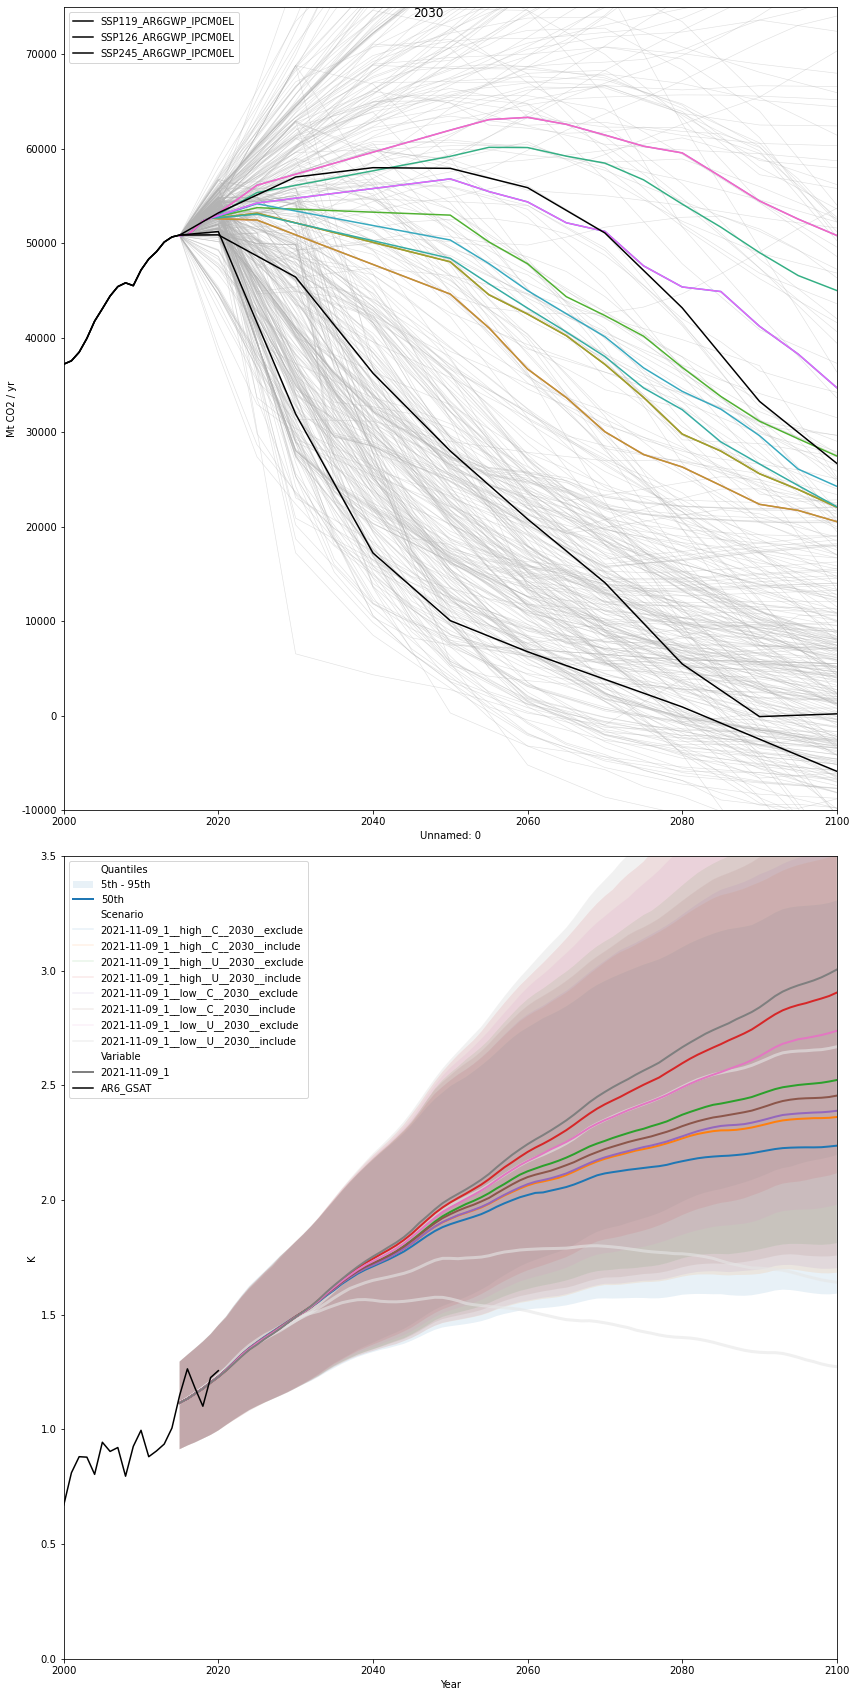

<IPython.core.display.Javascript object>

In [33]:
axs = plt.figure(figsize=(12, 24)).subplots(2)
plt.suptitle("2030")

filters = {
    "country_extension": "2030",
    "pathway_id": "2021-11-09_1",
    "year": range(2015, 2101),
}
lineplot_kwargs = {"hue": "scenario", "style": "pathway_id"}
plume_kwargs = {
    "hue_var": "scenario",
    "style_var": "pathway_id",
    "quantiles_plumes": [((0.05, 0.95), 0.1), ((0.5,), 1.0)],
}


sr15_data_cleaned.filter(variable="Emissions|GHG excl CO2 AFOLU (AR6GWP100)").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
extended_emissions.filter(**filters).lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

# ssp_data_dates = ssp_data["Unnamed: 0"].to_datetime(format="%Y%m")  # make a datetime

ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP119_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP126_AR6GWP_IPCM0EL", color="black")
ssp_data.plot(ax=axs[0], x="Unnamed: 0", y="SSP245_AR6GWP_IPCM0EL", color="black")

axs[0].set_ylim(-10000, 75000)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_sensitivity.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")


ar6gsat_data.plot(ax=axs[1], x="Year", y="AR6_GSAT", color="black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)
plt.tight_layout()
plt.savefig(get_figure_fname("2030_extension"))

## Methane

fig 3e

In [34]:
baseline_scenario = "2021-11-03_1__high__C__SSP1BL__exclude"
filters = {
    "scenario": [
        "2021-11-03_1__high__C__SSP1BL__exclude*",
        "2021-11-09_1__high__C__SSP1BL__exclude",
    ],
    "year": range(2015, 2101),
}

<IPython.core.display.Javascript object>

In [35]:
results_extra_methane = scmdata.ScmRun(OUT_COMPLETE_FNAME).filter(
    scenario=baseline_scenario
)

<IPython.core.display.Javascript object>

In [36]:
results_methane = scmdata.run_append([results_extra_methane, results_sensitivity])

<IPython.core.display.Javascript object>

In [37]:
results_methane_diff = results_methane.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3", quantile=0.5, **filters
)
results_methane_diff

<ScmRun (timeseries: 5, timepoints: 86)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     ambition conditionality country_extension exclude_hot_air label   methane_pledges          model    pathway_id  quantile region                                                  scenario  scenario_without_pathway unit  \
	440      high              C            SSP1BL         exclude   NaN               NaN  NDC Factsheet  2021-11-03_1       0.5  World                    2021-11-03_1__high__C__SSP1BL__exclude                       NaN    K   
	1846     high              C            SSP1BL         exclude     n    conditionalCH4  NDC Factsheet  2021-11-03_1       0.5  World    2021-11-03_1__high__C__SSP1BL__exclude__conditionalCH4  high__C__SSP1BL__exclude    K   
	1847     high              C            SSP1BL         exclude     m           fullCH4  NDC Factsheet  2021-11-03_1       0.5  World           2021-11-03_1__high__C__SSP1BL__exclude__fullCH4  high__C__SSP1BL__exclu

<IPython.core.display.Javascript object>

In [38]:
results_methane_diff = results_methane.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    quantile=0.5,
    **filters,
)
results_methane_diff = (
    results_methane_diff
    - results_methane_diff.filter(scenario=baseline_scenario).values.squeeze()
)

<IPython.core.display.Javascript object>

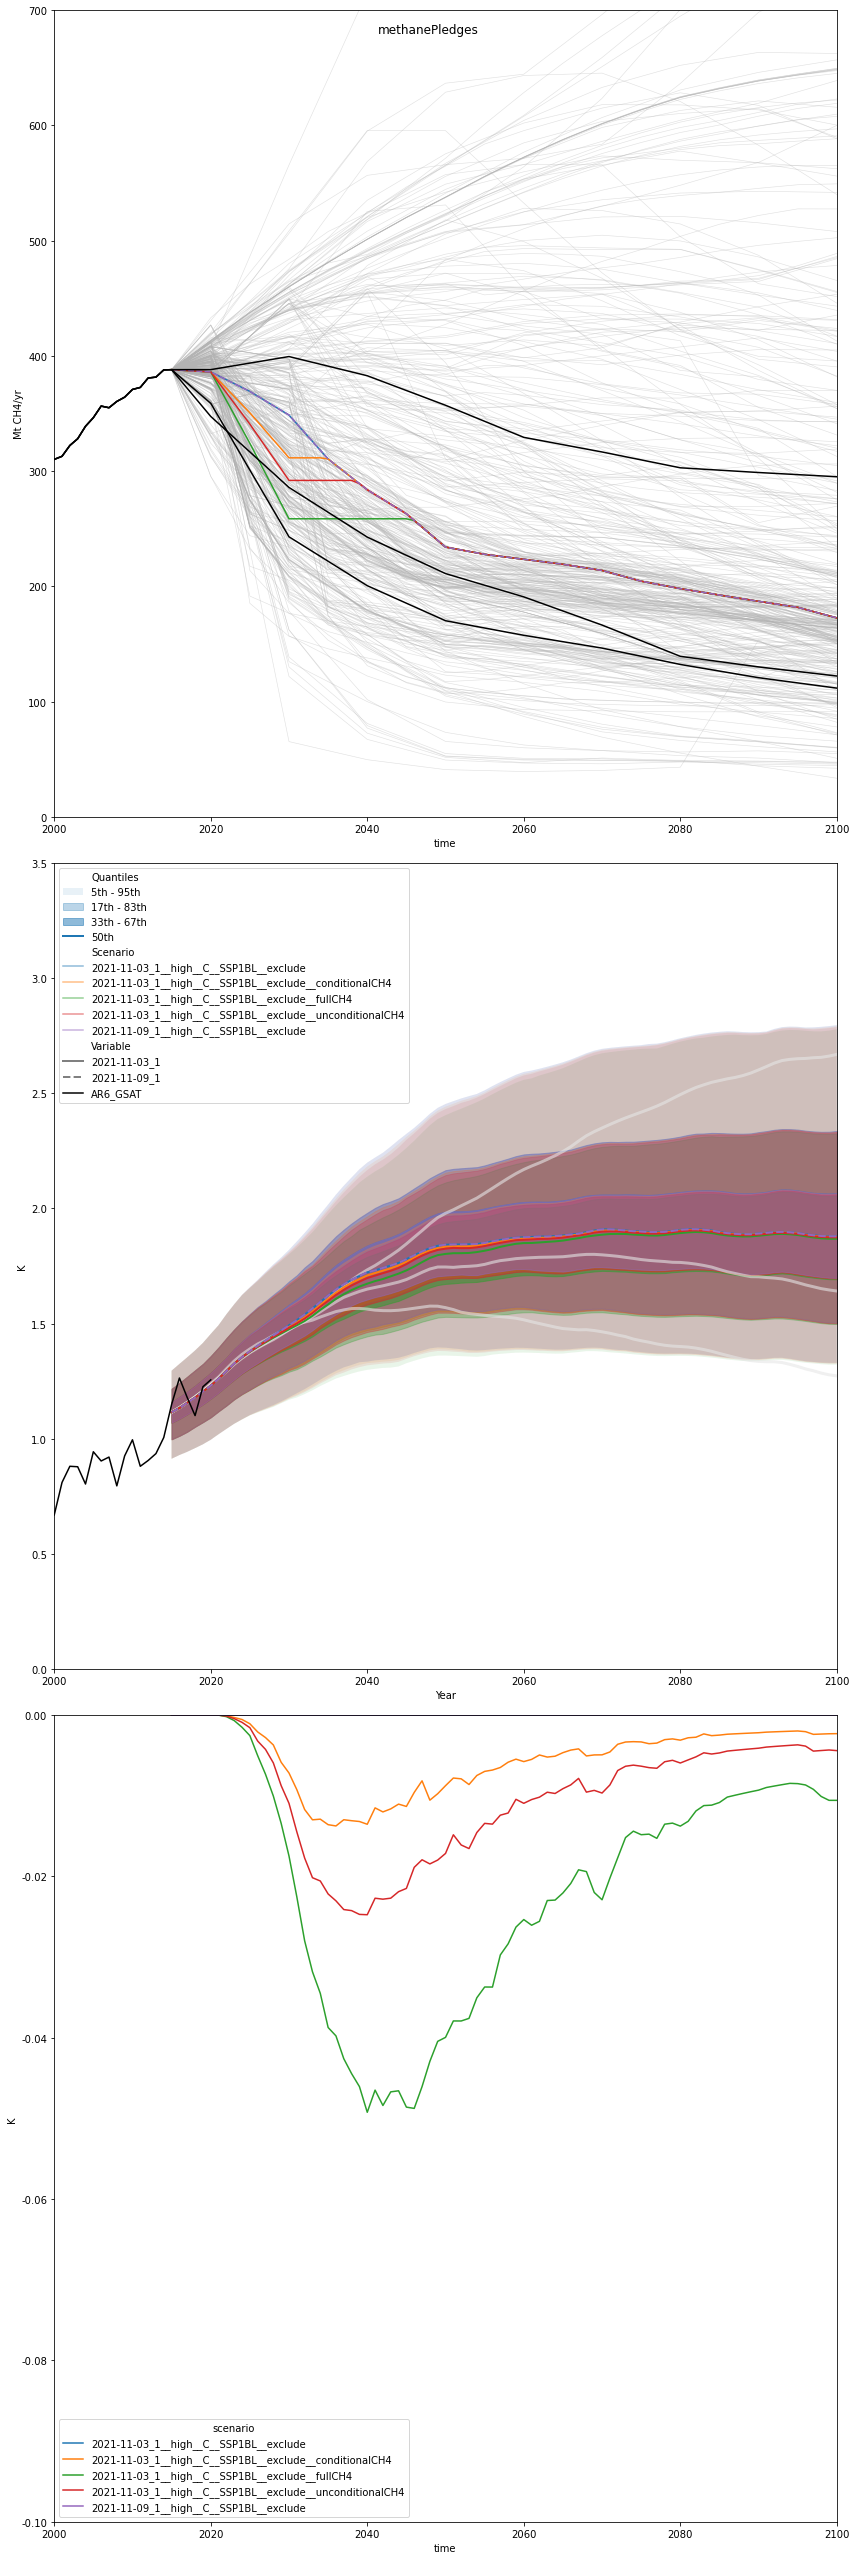

<IPython.core.display.Javascript object>

In [39]:
axs = plt.figure(figsize=(12, 36)).subplots(3)
plt.suptitle("methanePledges")


lineplot_kwargs = {"hue": "scenario", "style": "pathway_id"}
plume_kwargs = {
    "hue_var": "scenario",
    "style_var": "pathway_id",
    "quantiles_plumes": [
        ((0.05, 0.95), 0.1),
        ((0.1669999999999999, 0.833), 0.3),
        ((0.33, 0.67), 0.5),
        ((0.5,), 1.0),
    ],
}


sr15_data_cleaned.filter(variable="Emissions|CH4").lineplot(
    ax=axs[0], **pkwargs, time_axis="year"
)
results_methane.filter(**filters, variable="Infilled|Emissions|CH4").lineplot(
    ax=axs[0], **lineplot_kwargs, legend=False, time_axis="year"
)

rcmip_emissions.filter(variable="Emissions|CH4").lineplot(
    ax=axs[0],
    legend=False,
    time_axis="year",
    color="black",
    hue=None,
    units="scenario",
    estimator=None,
)


axs[0].set_ylim(0, 700)
axs[0].set_xlim(2000, 2100)


sr15_rcmip_data.filter(
    variable="Surface Temperature", quantile=0.5, year=filters["year"]
).lineplot(ax=axs[1], **ssp_pkwargs, time_axis="year")
results_methane.filter(
    variable="Surface Temperature (GSAT)|MAGICCv7.5.3",
    **filters,
).plumeplot(ax=axs[1], pre_calculated=True, **plume_kwargs, time_axis="year")

ar6gsat_data.plot(ax=axs[1], x="Year", y="AR6_GSAT", color="black")


axs[1].set_ylim(0, 3.5)
axs[1].set_xlim(2000, 2100)


results_methane_diff.line_plot(ax=axs[2], time_axis="year")

axs[2].set_ylim(-0.1, 0)
axs[2].set_xlim(2000, 2100)

plt.tight_layout()

plt.savefig(get_figure_fname("methane_extension"))

In [40]:
results_cleaned.head()

time                                                                                                                                                                                                                       1995-01-01  1996-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                                          include         b          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                        SSP1BL            exclude         A          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                                          include         A-hot air  NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   
                        constant          exclude         A-constant NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__constant__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3     1755.23     1757.19   

time                                                                                                                                                                                                                       1997-01-01  1998-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__exclude     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                                          include         b          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__2030__include     ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                        SSP1BL            exclude         A          NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__exclude   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                                          include         A-hot air  NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__SSP1BL__include   ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   
                        constant          exclude         A-constant NaN             NDC Factsheet 2021-11-09_1 0.1      World  2021-11-09_1__high__C__constant__exclude ppb  Atmospheric Concentrations|CH4|MAGICCv7.5.3      1761.5     1770.29   

time                                                                                                                                                                                                                       1999-01-01  2000-01-01  \
ambition conditionality country_extension exclude_hot_air label      methane_pledges model         pathway_id   quantile region scenario                                 unit variable                                                              
high     C              2030              exclude         a          NaN      

<IPython.core.display.Javascript object>